**Preprocesamiento de los datos para el desarrollo de un prototipo para la deteccion de somonolencia en conductores a partir de tecnicas de aprendizaje automatico**

Se realizo:


*   Convercion de datos categoricos a binarios
*   Limpieza de datos
*   Analisis de variables numericas  y categoricas


In [1]:
#Se procede a instalar librerias como matplotlib y numpy
!pip install matplotlib
!pip install numpy
!pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.7 MB/s eta 0:00:00


In [2]:
#Se realiza importancion de las librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from google.colab import drive
from sklearn.preprocessing import LabelEncoder
from unidecode import unidecode  # Importar la función unidecode desde la librería unidecode
from google.colab import drive

In [3]:
# Lectura del dataset
drive.mount('/gdrive')
ruta = "/gdrive/MyDrive/datasetu.csv"
data = pd.read_csv(ruta, encoding='latin-1')

Mounted at /gdrive


In [5]:
print(data.shape)
data.head()

(310, 15)


,Participante,Nombre,Edad,Fecha,Hora,Género,Anteojos,Barba,Bigote,Jornada,Clima,Luminosidad LUX,ID-Video,FC SISTOLE,FC DIASTOLE
0,1,Michael Arley Chaparro,27,01/12/2024,09:47:00 AM,Masculino,NO,SI,NO,MAÑANA,DESPEJADO,942,1,122,78
1,1,Michael Arley Chaparro,27,01/12/2024,09:49:00 AM,Masculino,NO,SI,NO,MAÑANA,DESPEJADO,429,1,122,78
2,1,Michael Arley Chaparro,27,01/12/2024,09:51:00 AM,Masculino,NO,SI,NO,MAÑANA,DESPEJADO,439,1,118,76
3,1,Michael Arley Chaparro,27,01/12/2024,09:53:00 AM,Masculino,NO,SI,NO,MAÑANA,DESPEJADO,740,1,118,76
4,1,Michael Arley Chaparro,27,01/12/2024,09:55:00 AM,Masculino,NO,SI,NO,MAÑANA,DESPEJADO,990,1,121,78


In [6]:
# Veamos las variables categóricas y las numéricas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Participante      310 non-null    int64 
 1   Nombre            310 non-null    object
 2   Edad              310 non-null    int64 
 3   Fecha             310 non-null    object
 4   Hora              310 non-null    object
 5   Género            310 non-null    object
 6   Anteojos          310 non-null    object
 7   Barba             310 non-null    object
 8   Bigote            310 non-null    object
 9   Jornada           310 non-null    object
 10  Clima             310 non-null    object
 11  Luminosidad  LUX  310 non-null    int64 
 12  ID-Video          310 non-null    int64 
 13  FC SISTOLE        310 non-null    int64 
 14  FC DIASTOLE       310 non-null    int64 
dtypes: int64(6), object(9)
memory usage: 36.5+ KB


In [7]:
#Como se pudo evidenciar en el paso anterior, hay datos categoricos la cual se deben convertir a dato numerico:
#  Codificacion de columnas categóricas: Genero y Clima
data = {
    'Género': ['Masculino', 'Femenino', ],
    'Clima': ['Despejado', 'Nublado']
}
df = pd.DataFrame(data)

print("DataFrame original:")
print(df)

DataFrame original:
      Género      Clima
0  Masculino  Despejado
1   Femenino    Nublado


In [8]:
# Leer el archivo CSV en un DataFrame
codificacion = "latin-1"
df = pd.read_csv(ruta, encoding=codificacion)

# Verificar las primeras filas del DataFrame para asegurarse de que se cargó correctamente
print(df.head())

# Lista de nombres de columnas a codificar
columnas_codificar = [ 'Género', 'Clima',  ]

# Inicializar el LabelEncoder
encoder = LabelEncoder()
# Iterar sobre cada columna y aplicar LabelEncoder
for columna in columnas_codificar:
    if columna in df.columns:  # Verificar si la columna está presente en el DataFrame
        df[columna + '_encoded'] = encoder.fit_transform(df[columna])
    else:
        print(f"La columna '{columna}' no está presente en el DataFrame.")

   Participante                  Nombre  Edad       Fecha         Hora  \
0             1  Michael Arley Chaparro    27  01/12/2024  09:47:00 AM   
1             1  Michael Arley Chaparro    27  01/12/2024  09:49:00 AM   
2             1  Michael Arley Chaparro    27  01/12/2024  09:51:00 AM   
3             1  Michael Arley Chaparro    27  01/12/2024  09:53:00 AM   
4             1  Michael Arley Chaparro    27  01/12/2024  09:55:00 AM   

      Género Anteojos Barba Bigote Jornada      Clima  Luminosidad  LUX  \
0  Masculino       NO    SI     NO  MAÑANA  DESPEJADO               942   
1  Masculino       NO    SI     NO  MAÑANA  DESPEJADO               429   
2  Masculino       NO    SI     NO  MAÑANA  DESPEJADO               439   
3  Masculino       NO    SI     NO  MAÑANA  DESPEJADO               740   
4  Masculino       NO    SI     NO  MAÑANA  DESPEJADO               990   

   ID-Video  FC SISTOLE  FC DIASTOLE  
0         1         122           78  
1         1         122   

In [11]:
  # Convertir la columna 'Hora' a tipo datetime
  df['Hora'] = pd.to_datetime(df['Hora'])

  # Extraer componentes de tiempo como características numéricas
  df['Hora_del_dia'] = df['Hora'].dt.hour  # Extraer la hora del día (0-23)
  df['Minutos'] = df['Hora'].dt.minute  # Extraer los minutos (0-59)
  df['Segundos'] = df['Hora'].dt.second  # Extraer los segundos (0-59)

  # Eliminar la columna original 'Hora' si ya no es necesaria
  df.drop('Hora', axis=1, inplace=True)

  # Mostrar el DataFrame resultante
  print(df)

     Participante                        Nombre  Edad       Fecha     Género  \
0               1        Michael Arley Chaparro    27  01/12/2024  Masculino   
1               1        Michael Arley Chaparro    27  01/12/2024  Masculino   
2               1        Michael Arley Chaparro    27  01/12/2024  Masculino   
3               1        Michael Arley Chaparro    27  01/12/2024  Masculino   
4               1        Michael Arley Chaparro    27  01/12/2024  Masculino   
..            ...                           ...   ...         ...        ...   
305            10  Diana Carolina Fajardo Pérez    37  01/31/2024   Femenino   
306            10  Diana Carolina Fajardo Pérez    37  01/31/2024   Femenino   
307            10  Diana Carolina Fajardo Pérez    37  01/31/2024   Femenino   
308            10  Diana Carolina Fajardo Pérez    37  01/31/2024   Femenino   
309            10  Diana Carolina Fajardo Pérez    37  01/31/2024   Femenino   

    Anteojos Barba Bigote Jornada      

<ipython-input-11-abd9360d1f44>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hora'] = pd.to_datetime(df['Hora'])


In [12]:
print(df.dtypes)

Participante         int64
Nombre              object
Edad                 int64
Fecha               object
Género              object
Anteojos            object
Barba               object
Bigote              object
Jornada             object
Clima               object
Luminosidad  LUX     int64
ID-Video             int64
FC SISTOLE           int64
FC DIASTOLE          int64
Género_encoded       int64
Clima_encoded        int64
Hora_del_dia         int32
Minutos              int32
Segundos             int32
dtype: object


In [13]:
#Ahora si, se procedera con la limpieza de los datos:
#Limpieza
#1.. Datos faltantes
df.dropna(inplace=True) # Eliminar filas o columnas que contienen valores NaN (valores faltantes) del DataFrame

# Imprimir información sobre el DataFrame después de la limpieza
print("Información del DataFrame después de la limpieza:")
print(df.info())

Información del DataFrame después de la limpieza:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Participante      310 non-null    int64 
 1   Nombre            310 non-null    object
 2   Edad              310 non-null    int64 
 3   Fecha             310 non-null    object
 4   Género            310 non-null    object
 5   Anteojos          310 non-null    object
 6   Barba             310 non-null    object
 7   Bigote            310 non-null    object
 8   Jornada           310 non-null    object
 9   Clima             310 non-null    object
 10  Luminosidad  LUX  310 non-null    int64 
 11  ID-Video          310 non-null    int64 
 12  FC SISTOLE        310 non-null    int64 
 13  FC DIASTOLE       310 non-null    int64 
 14  Género_encoded    310 non-null    int64 
 15  Clima_encoded     310 non-null    int64 
 16  Hora_del_dia

In [14]:
#2.. Columnas irrelevantes
#2.1.. Analisis de las variables categoricas
# Conteo de los niveles en las diferentes columnas categóricas
cols_cat = [  'Fecha',  'Género',
       'Anteojos', 'Barba', 'Clima' ]

for col in cols_cat:
   # Calcular el número de niveles únicos en la columna
    num_niveles = df[col].nunique()

   # Imprimir el resultado del análisis para cada columna
    print(f'Columna {col}: {num_niveles} subniveles')

Columna Fecha: 8 subniveles
Columna Género: 3 subniveles
Columna Anteojos: 2 subniveles
Columna Barba: 3 subniveles
Columna Clima: 2 subniveles


In [15]:
#Columnas irrevelantes
 #Se eliminara la columna Bigote, ya que contiene un solo valor y la columna jornada,
 #ya que proporciona informacion rebundante. Asi mismo, la columna 'Nombre' porque existe una columna llamada numero de participante.

# Verificar que 'data' sea un DataFrame
if isinstance(df, pd.DataFrame):
    # Imprimir el tamaño del DataFrame antes de eliminar columnas irrelevantes
    print(f'Tamaño del DataFrame antes de eliminar las columnas irrelevantes: {df.shape}')

    # Eliminar las columnas irrelevantes ('Nombre', 'Bigote', 'Jornada', 'ID-Video', 'Fecha', 'Anteojos', 'Barba', 'Segundos')
    df.drop(columns=['Nombre', 'Bigote', 'Jornada', 'ID-Video', 'Fecha', 'Anteojos', 'Barba', 'Segundos'], inplace=True)

    # Imprimir el tamaño del DataFrame después de eliminar las columnas irrelevantes
    print(f'Tamaño del DataFrame después de eliminar las columnas irrelevantes: {df.shape}')
else:
    print("Error: 'df' no es un DataFrame válido.")

Tamaño del DataFrame antes de eliminar las columnas irrelevantes: (310, 19)
Tamaño del DataFrame después de eliminar las columnas irrelevantes: (310, 11)


In [16]:
#2.2.. Analisis de las variables numericas
df.describe() #  generar un resumen estadístico de un DataFrame

,Participante,Edad,Luminosidad LUX,FC SISTOLE,FC DIASTOLE,Género_encoded,Clima_encoded,Hora_del_dia,Minutos
count,310.000000,310.000000,310.000000,310.000000,310.00000,310.000000,310.000000,310.000000,310.000000
mean,5.500000,29.800000,443.664516,116.748387,76.16129,1.500000,0.200000,14.858065,29.616129
std,2.876925,6.299843,681.613665,11.018721,7.09846,0.807529,0.400647,3.808420,17.340425
min,1.000000,22.000000,1.000000,85.000000,47.00000,0.000000,0.000000,9.000000,0.000000
25%,3.000000,27.000000,13.000000,110.250000,71.00000,1.000000,0.000000,10.000000,15.000000
50%,5.500000,29.000000,44.500000,116.000000,77.00000,2.000000,0.000000,15.000000,30.000000
75%,8.000000,31.000000,750.750000,123.000000,80.00000,2.000000,0.000000,19.000000,45.000000
max,10.000000,44.000000,3158.000000,183.000000,100.00000,2.000000,1.000000,21.000000,59.000000


In [17]:
#Filas repetidas
print(f'Tamaño del set antes de eliminar las filas repetidas: {df.shape}')
df.drop_duplicates(inplace=True) # eliminar filas duplicadas de un DataFrame.

print(f'Tamaño del set después de eliminar las filas repetidas: {df.shape}')

Tamaño del set antes de eliminar las filas repetidas: (310, 11)
Tamaño del set después de eliminar las filas repetidas: (310, 11)


In [18]:
# Renombrar las columnas utilizando el método rename()
nuevos_nombres = {
    'Luminosidad  LUX': 'Luminosidad',
    'FC SISTOLE': 'fc_sistole',
    'FC DIASTOLE': 'fc_diastole'
}

# Aplicar los nuevos nombres utilizando el método rename()
df.rename(columns=nuevos_nombres, inplace=True)

# Verificar los nombres de las columnas actualizados
print(df.columns)

Index(['Participante', 'Edad', 'Género', 'Clima', 'Luminosidad', 'fc_sistole',
       'fc_diastole', 'Género_encoded', 'Clima_encoded', 'Hora_del_dia',
       'Minutos'],
      dtype='object')


In [19]:
# Imprimir las primeras filas del DataFrame para verificar las columnas
print(df.head())

# Lista de nombres de columnas actuales en el DataFrame
print(df.columns)

   Participante  Edad     Género      Clima  Luminosidad  fc_sistole  \
0             1    27  Masculino  DESPEJADO          942         122   
1             1    27  Masculino  DESPEJADO          429         122   
2             1    27  Masculino  DESPEJADO          439         118   
3             1    27  Masculino  DESPEJADO          740         118   
4             1    27  Masculino  DESPEJADO          990         121   

   fc_diastole  Género_encoded  Clima_encoded  Hora_del_dia  Minutos  
0           78               2              0             9       47  
1           78               2              0             9       49  
2           76               2              0             9       51  
3           76               2              0             9       53  
4           78               2              0             9       55  
Index(['Participante', 'Edad', 'Género', 'Clima', 'Luminosidad', 'fc_sistole',
       'fc_diastole', 'Género_encoded', 'Clima_encoded', 'Hora

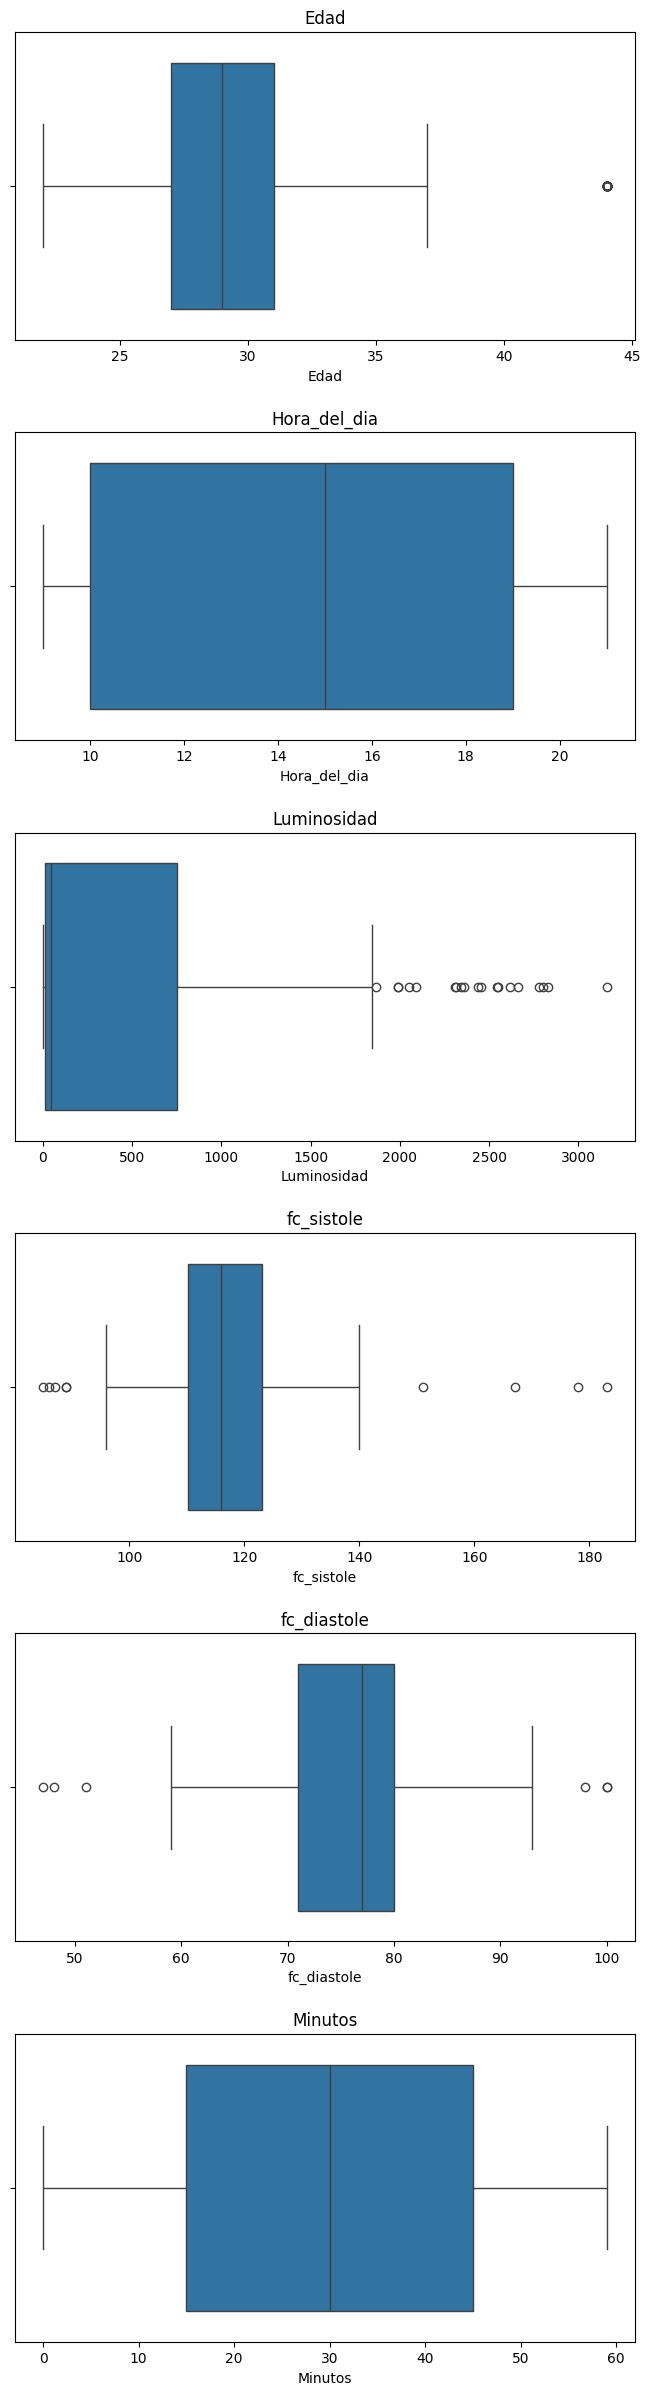

In [20]:
#Outliers en las variables numéricas

# Generar gráficas individuales pues las variables numéricas
# están en rangos diferentes
cols_num = [ 'Edad','Hora_del_dia', 'Luminosidad', 'fc_sistole',
            'fc_diastole', 'Minutos']

fig, ax = plt.subplots(nrows=6, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.3)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=df, ax=ax[i])
    ax[i].set_title(col)

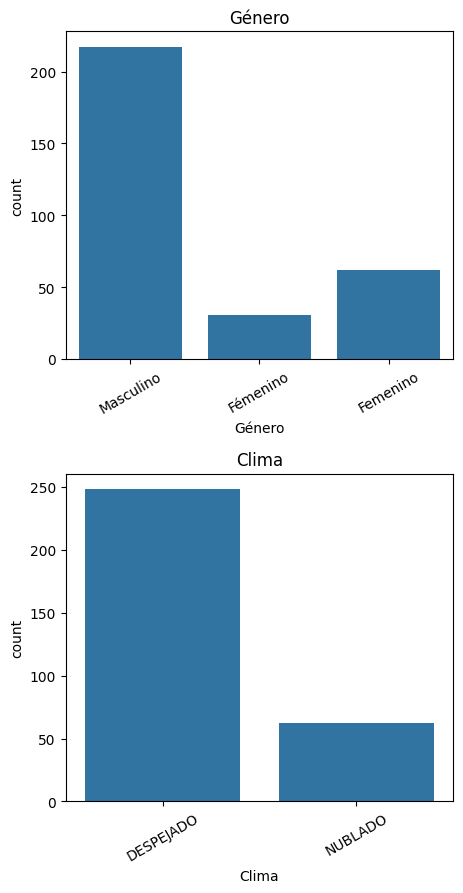

In [21]:
#Errores tipográficos en variables categóricas
# Graficar los subniveles de cada variable categórica
cols_cat = ['Género', 'Clima']

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(5,10))
fig.subplots_adjust(hspace=0.35)

for i, col in enumerate(cols_cat):
    sns.countplot(x=col, data=df, ax=ax[i])
    ax[i].set_title(col)
    ax[i].tick_params(axis='x', labelrotation=30)  # Rotar etiquetas del eje x

plt.show()

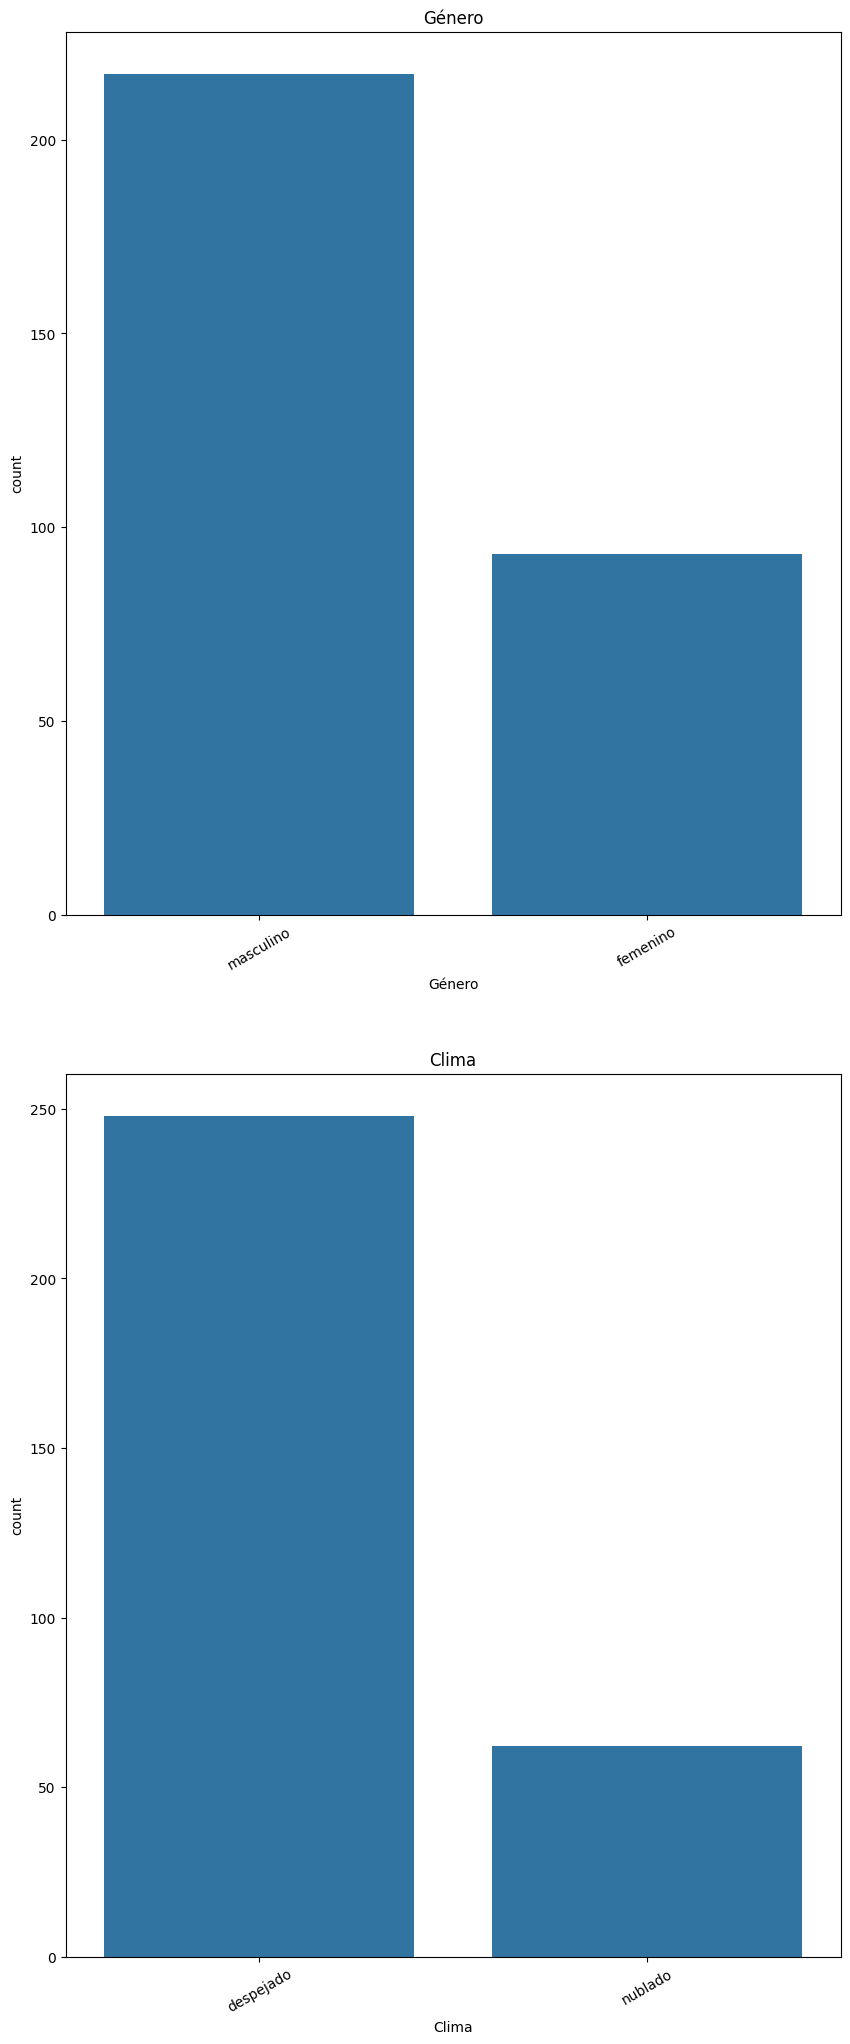

In [22]:
#Inicialmente se observa que hay sub-niveles con el mismo nombre pero escritos en minúscula, en mayúscula o con la primera letra en mayúscula, incluso unas con til y las otras no.
# La columna 'Genero' tiene datos Masculino, Fémenino y Femenino

# Convertir las entradas de las columnas categóricas a minúsculas
for column in df.columns:
    # Representar en minúsculas sólo si la columna es categórica y unidecode para normalizar tildes
    if column in cols_cat:
        df[column] = df[column].str.lower().apply(unidecode)

# Y generemos las gráficas nuevamente
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,25))
fig.subplots_adjust(hspace=0.18)

for i, col in enumerate(cols_cat):
    sns.countplot(x=col, data=df, ax=ax[i])
    ax[i].set_title(col)
    ax[i].tick_params(axis='x', labelrotation=30)  # Rotar etiquetas del eje x

plt.show()

In [23]:
print(df.shape)
df.head()

(310, 11)


,Participante,Edad,Género,Clima,Luminosidad,fc_sistole,fc_diastole,Género_encoded,Clima_encoded,Hora_del_dia,Minutos
0,1,27,masculino,despejado,942,122,78,2,0,9,47
1,1,27,masculino,despejado,429,122,78,2,0,9,49
2,1,27,masculino,despejado,439,118,76,2,0,9,51
3,1,27,masculino,despejado,740,118,76,2,0,9,53
4,1,27,masculino,despejado,990,121,78,2,0,9,55


In [24]:
#Como se necesita que el conjunto de datos sea numerico se eliminara las columnas originales de:  'Genero',  'Clima',

print(f'Tamaño del DataFrame antes de eliminar las columnas categoricas: {df.shape}')

df.drop(columns=['Género'], inplace=True)
df.drop(columns=['Clima'], inplace=True)

print(f'Tamaño del DataFrame después de eliminar las columnas categoricas: {df.shape}')

Tamaño del DataFrame antes de eliminar las columnas categoricas: (310, 11)
Tamaño del DataFrame después de eliminar las columnas categoricas: (310, 9)


In [25]:
print(df.shape)
df.head()

(310, 9)


,Participante,Edad,Luminosidad,fc_sistole,fc_diastole,Género_encoded,Clima_encoded,Hora_del_dia,Minutos
0,1,27,942,122,78,2,0,9,47
1,1,27,429,122,78,2,0,9,49
2,1,27,439,118,76,2,0,9,51
3,1,27,740,118,76,2,0,9,53
4,1,27,990,121,78,2,0,9,55


In [26]:
#Ahora, se reorganizara el orden de las columnas con el fin de que la variable independiente me quede de utlimas
# 1.Definir el orden deseado de las columnas
column_order = ['Participante', 'Edad', 'Luminosidad', 'Género_encoded', 'Clima_encoded','Hora_del_dia', 'Minutos', 'fc_diastole', 'fc_sistole']  # Aquí 'FC DIASTOLE', 'FC SISTOLE' se mueven al final

# Reorganizar las columnas según el orden deseado
df = df[column_order]

print(df.shape)
df.head()

(310, 9)


,Participante,Edad,Luminosidad,Género_encoded,Clima_encoded,Hora_del_dia,Minutos,fc_diastole,fc_sistole
0,1,27,942,2,0,9,47,78,122
1,1,27,429,2,0,9,49,78,122
2,1,27,439,2,0,9,51,76,118
3,1,27,740,2,0,9,53,76,118
4,1,27,990,2,0,9,55,78,121


In [27]:
#Listo, el dataset esta listo.
from google.colab import drive
drive.mount('/content/drive')

#Ahora se importa el dataset limpio

# 'data' es tu DataFrame modificado y 'ruta' es la ruta de destino en Google Drive
ruta = "/content/drive/MyDrive/dataset_limpio.csv"  # Ruta donde deseas guardar el archivo CSV en Google Drive

#  Guardar el DataFrame 'df' como un archivo CSV en la ruta especificada
df.to_csv(ruta, index=False)

print(f"El DataFrame ha sido guardado exitosamente en '{ruta}'.")

Mounted at /content/drive
El DataFrame ha sido guardado exitosamente en '/content/drive/MyDrive/dataset_limpio.csv'.


Analisis de los datos:

Se realizo los siguientes;
Matriz de correlacion
Analisis de densidad para las variables numericas
# Histograma de frecuencia cardíaca




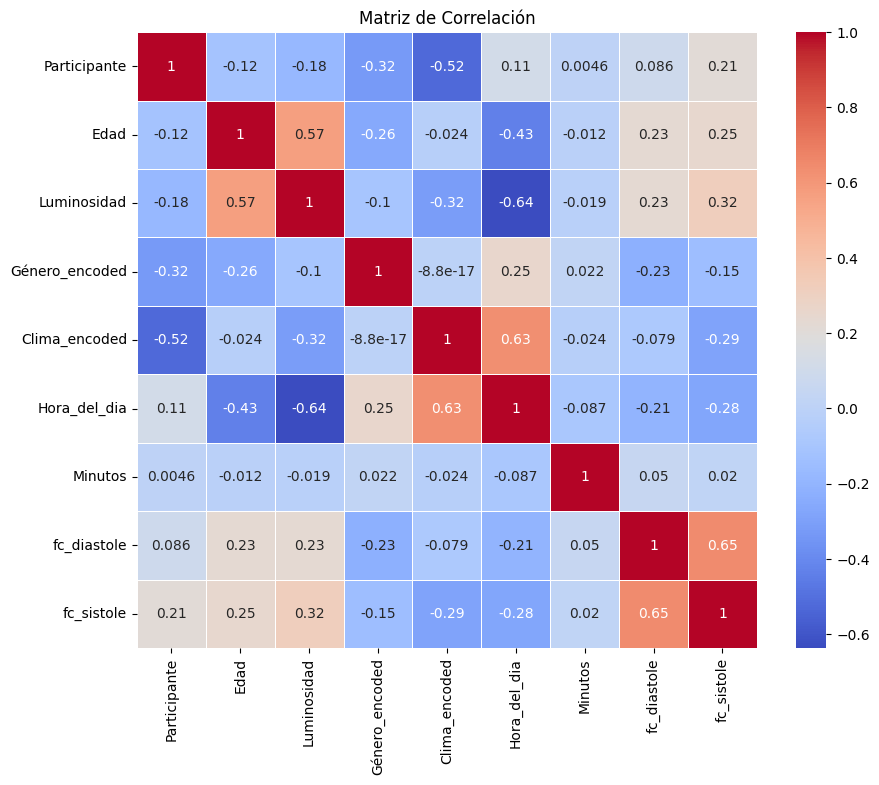

In [29]:

# Matriz de correlación entre variables numéricas
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

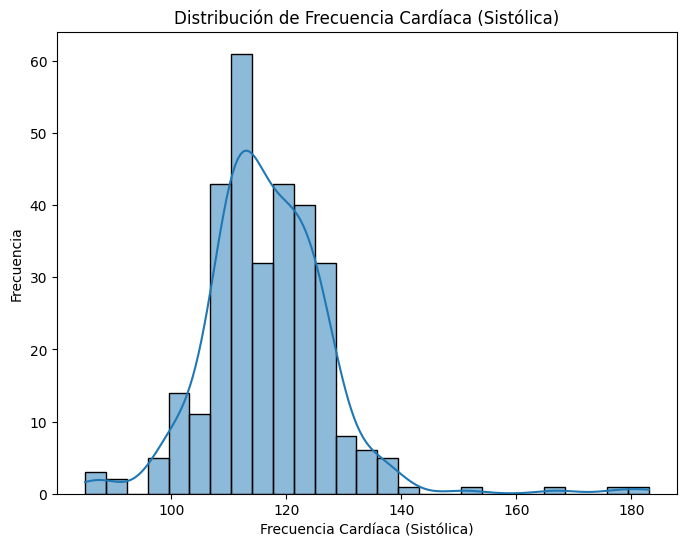

In [30]:
# Histograma de frecuencia cardíaca
plt.figure(figsize=(8, 6))
sns.histplot(df['fc_sistole'], kde=True)
plt.title('Distribución de Frecuencia Cardíaca (Sistólica)')
plt.xlabel('Frecuencia Cardíaca (Sistólica)')
plt.ylabel('Frecuencia')
plt.show()

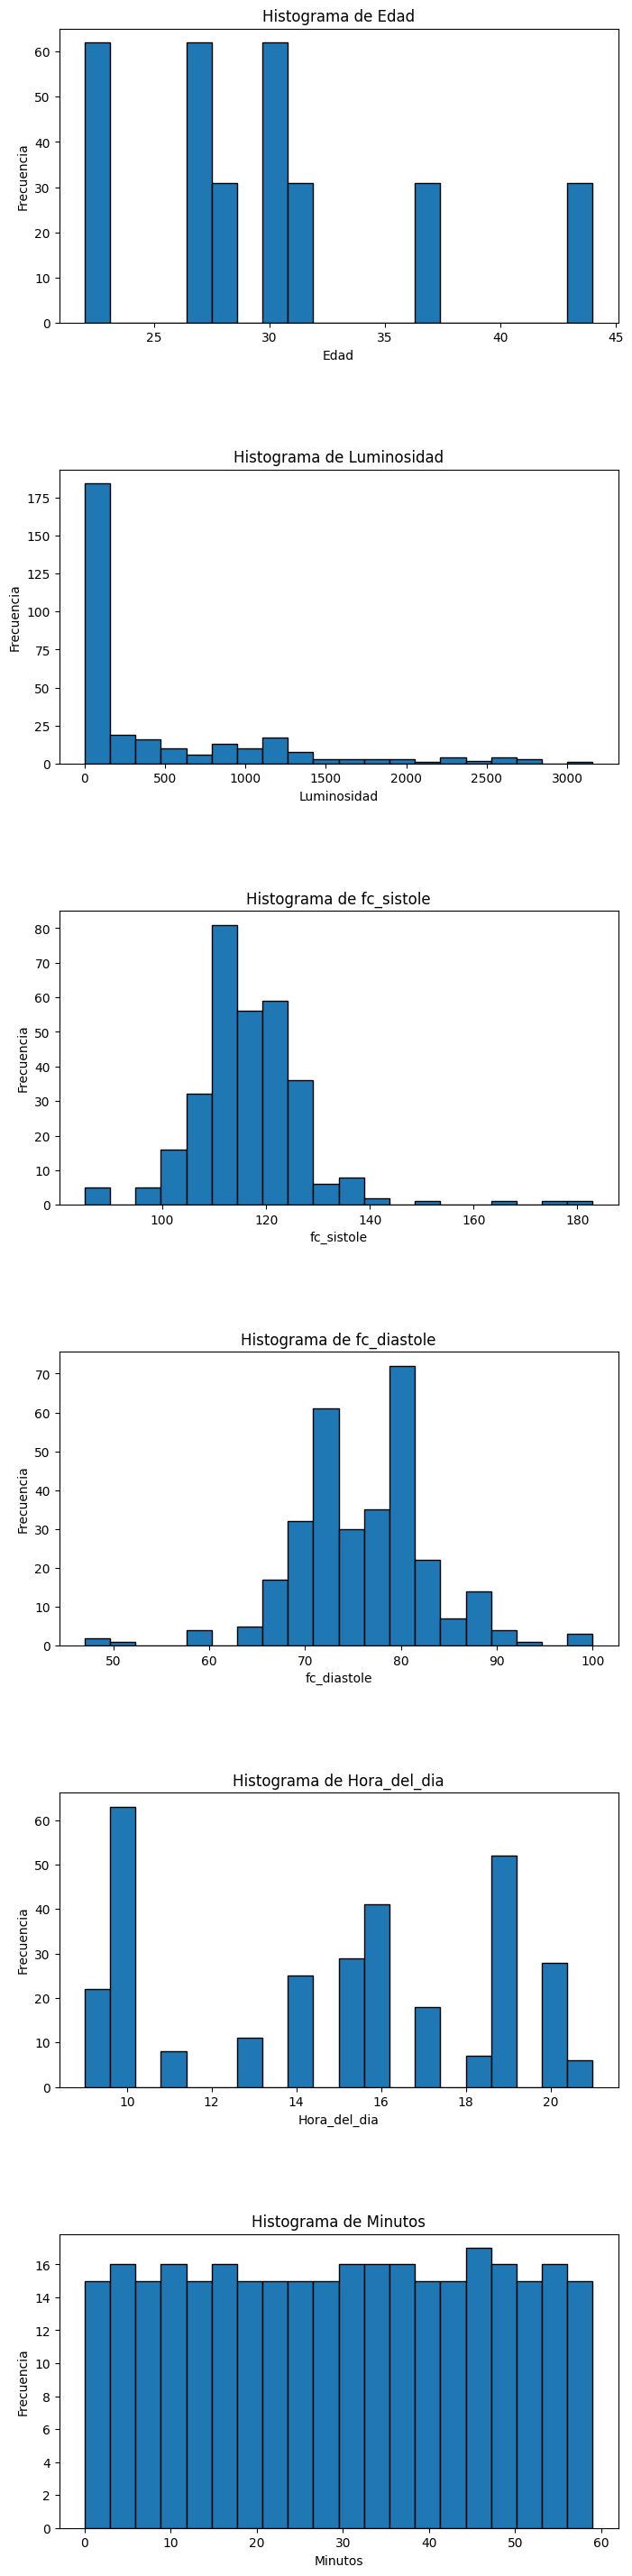

In [31]:
# histogramas para cada variable numérica
num_cols = ['Edad', 'Luminosidad', 'fc_sistole', 'fc_diastole', 'Hora_del_dia', 'Minutos']

fig, ax = plt.subplots(nrows=len(num_cols), ncols=1, figsize=(8, 6*len(num_cols)))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(num_cols):
    ax[i].hist(df[col], bins=20, edgecolor='black')
    ax[i].set_title(f'Histograma de {col}')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Frecuencia')

plt.show()

<ipython-input-32-88c4663390a6>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], ax=ax[i], shade=True)
<ipython-input-32-88c4663390a6>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], ax=ax[i], shade=True)
<ipython-input-32-88c4663390a6>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], ax=ax[i], shade=True)
<ipython-input-32-88c4663390a6>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], ax=ax[i], shade=True)
<ipython-input-32-88c4663390a6>:6: FutureWarning: 

`sha

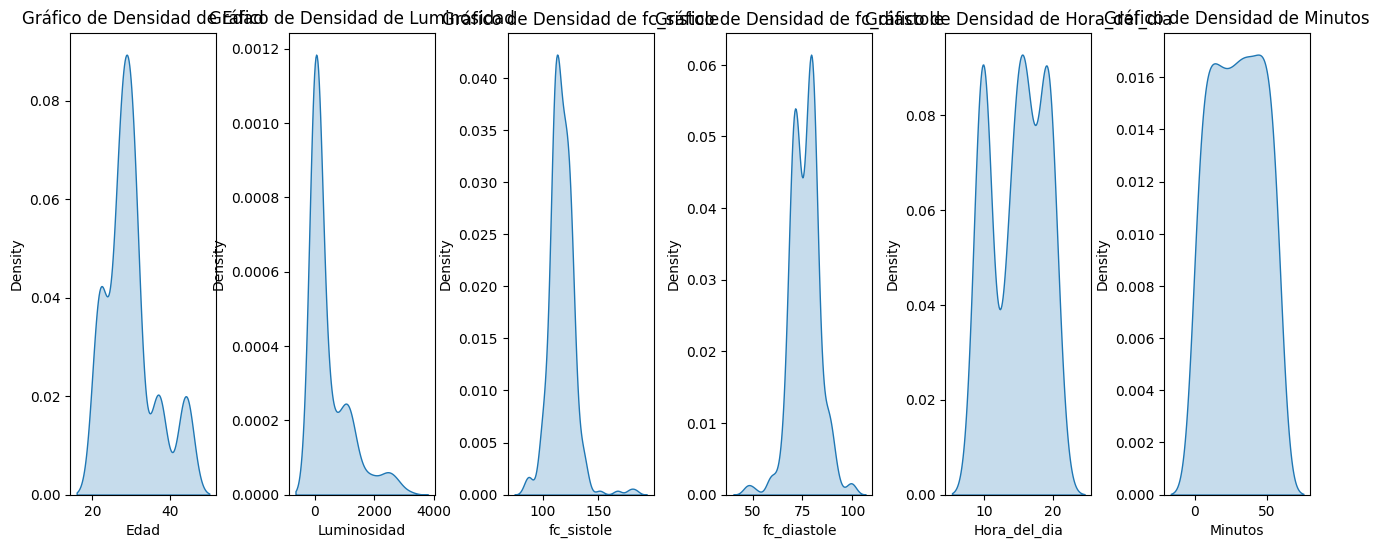

In [32]:
# Gráficos de densidad para cada variable numérica
fig, ax = plt.subplots(nrows=1, ncols=len(num_cols), figsize=(16, 6))
fig.subplots_adjust(wspace=0.5)

for i, col in enumerate(num_cols):
    sns.kdeplot(df[col], ax=ax[i], shade=True)
    ax[i].set_title(f'Gráfico de Densidad de {col}')

plt.show()